In [3]:
import numpy as np
import pandas as pd


In [5]:
df_btc = pd.read_csv('BTC-USD.csv')
df_eth = pd.read_csv('ETH-USD.csv')
df_ltc = pd.read_csv('LTC-USD.csv')

In [6]:
df_btc.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-11,55847.242188,56872.542969,54608.652344,56704.574219,56704.574219,61308396325
1,2021-05-12,56714.531250,57939.363281,49150.535156,49150.535156,49150.535156,75215403907
2,2021-05-13,49735.433594,51330.843750,46980.019531,49716.191406,49716.191406,96721152926
3,2021-05-14,49682.980469,51438.117188,48868.578125,49880.535156,49880.535156,55737497453
4,2021-05-15,49855.496094,50639.664063,46664.140625,46760.187500,46760.187500,59161047474


In [7]:
df_eth.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-11,3948.271973,4178.208984,3783.889404,4168.701172,4168.701172,52679737865
1,2021-05-12,4174.635742,4362.350586,3785.848633,3785.848633,3785.848633,69023382175
2,2021-05-13,3828.918457,4032.563477,3549.407227,3715.148438,3715.148438,78398214539
3,2021-05-14,3720.122314,4171.017090,3703.399902,4079.057373,4079.057373,48174271215
4,2021-05-15,4075.951660,4129.185547,3638.122070,3638.122070,3638.122070,42422321751


In [8]:
df_ltc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-11,359.258087,378.859131,345.298828,377.388794,377.388794,8798204078
1,2021-05-12,377.670532,393.132477,303.084869,303.084869,303.084869,8782996412
2,2021-05-13,310.102386,332.028473,292.280670,316.909332,316.909332,9777636796
3,2021-05-14,317.517212,338.098053,308.707672,326.233856,326.233856,6413801038
4,2021-05-15,326.397919,331.592621,297.590851,299.772522,299.772522,5642887118


In [9]:
df = pd.DataFrame ({'BTC': df_btc['Close'],
'ETH': df_eth['Close'],
'LTC': df_ltc['Close']
})

df

,BTC,ETH,LTC
0,56704.574219,4168.701172,377.388794
1,49150.535156,3785.848633,303.084869
2,49716.191406,3715.148438,316.909332
3,49880.535156,4079.057373,326.233856
4,46760.187500,3638.122070,299.772522
...,...,...,...
361,35501.953125,2636.093018,94.570900
362,34059.265625,2517.459961,93.976433
363,30296.953125,2245.430420,77.957153
364,31022.906250,2343.510986,80.226830


In [10]:
df.describe()

,BTC,ETH,LTC
count,366.000000,366.000000,366.000000
mean,44529.136228,3162.258393,154.470143
std,8481.137477,712.765836,44.061331
min,29709.132813,1787.510742,68.653343
25%,38422.833008,2620.562683,121.259975
50%,42868.378906,3093.899292,147.869179
75%,48842.728516,3671.505127,179.469475
max,67566.828125,4812.087402,377.388794


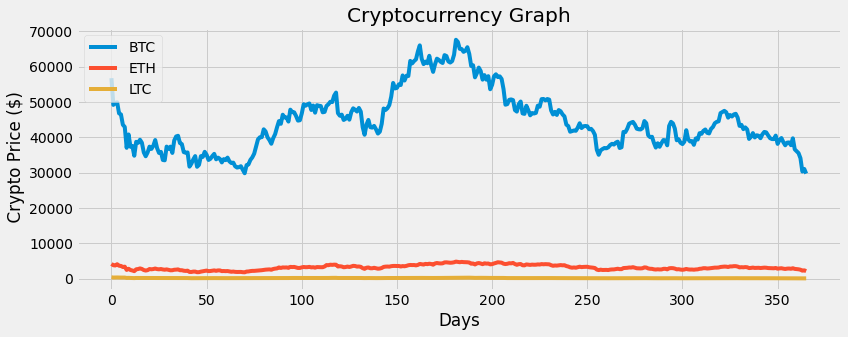

In [11]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
my_crypto = df
plt.figure(figsize = (12.2, 4.5))
for c in my_crypto.columns.values:
   plt.plot(my_crypto[c], label = c)
plt.title('Cryptocurrency Graph')
plt.xlabel('Days')
plt.ylabel(' Crypto Price ($)')
plt.legend(my_crypto.columns.values, loc= 'upper left')
plt.show()

In [13]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(df)
scaled

array([[ 71.30767254,  78.72805677, 100.        ],
       [ 51.35389828,  66.07000303,  75.93281732],
       [ 52.8480628 ,  63.73247937,  80.41058719],
       ...,
       [  1.55271024,  15.13995939,   3.01352176],
       [  3.47029429,  18.38274597,   3.74867446],
       [  0.        ,  11.05257821,   0.        ]])

In [14]:
df_scale = pd.DataFrame(scaled, columns = df.columns)

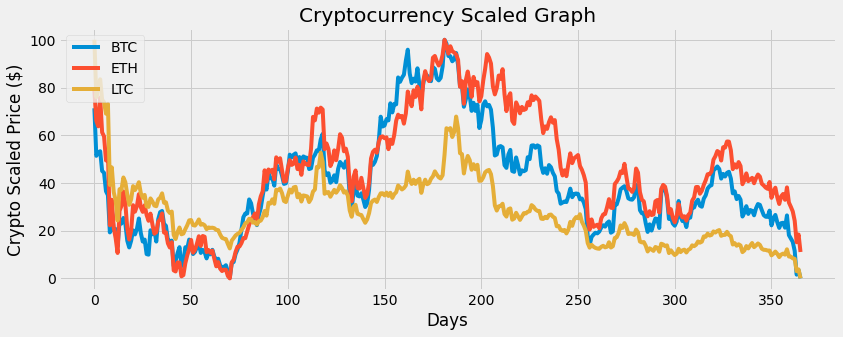

In [15]:
my_crypto = df_scale
plt.figure(figsize=(12.4, 4.5))
for c in my_crypto.columns.values:
   plt.plot(my_crypto[c], label=c)
plt.title('Cryptocurrency Scaled Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Scaled Price ($)')
plt.legend(my_crypto.columns.values, loc = 'upper left')
plt.show()

In [16]:
DSR = df.pct_change(1)
DSR

,BTC,ETH,LTC
0,NaN,NaN,NaN
1,-0.133217,-0.091840,-0.196890
2,0.011509,-0.018675,0.045613
3,0.003306,0.097953,0.029423
4,-0.062556,-0.108097,-0.081112
...,...,...,...
361,-0.014954,-0.021851,-0.022945
362,-0.040637,-0.045003,-0.006286
363,-0.110464,-0.108057,-0.170461
364,0.023961,0.043680,0.029114


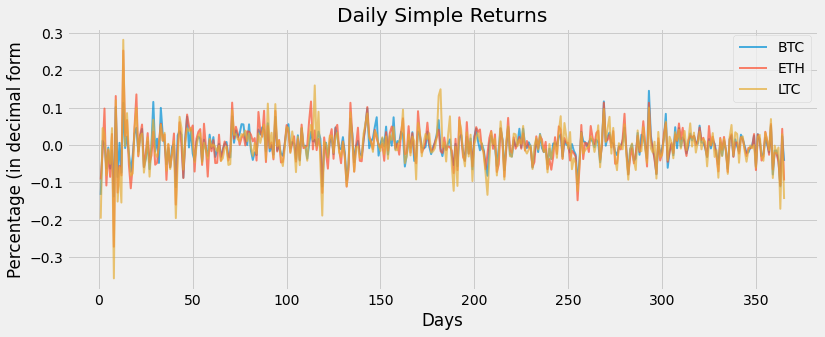

In [17]:
plt.figure(figsize=(12, 4.5))
for c in DSR.columns.values:
   plt.plot(DSR.index, DSR[c], label = c, lw = 2, alpha = .7)
plt.title('Daily Simple Returns')
plt.ylabel('Percentage (in decimal form')
plt.xlabel('Days')
plt.legend(DSR.columns.values, loc= 'upper right')
plt.show()

In [18]:
print('The cryptocurrency volatility:')
DSR.std()

The cryptocurrency volatility:


BTC    0.038349
ETH    0.049531
LTC    0.055527
dtype: float64

In [19]:
DSR.mean()

BTC   -0.001032
ETH   -0.000606
LTC   -0.003048
dtype: float64

In [20]:
DSR.corr()

,BTC,ETH,LTC
BTC,1.000000,0.850562,0.838972
ETH,0.850562,1.000000,0.863889
LTC,0.838972,0.863889,1.000000


<AxesSubplot:>

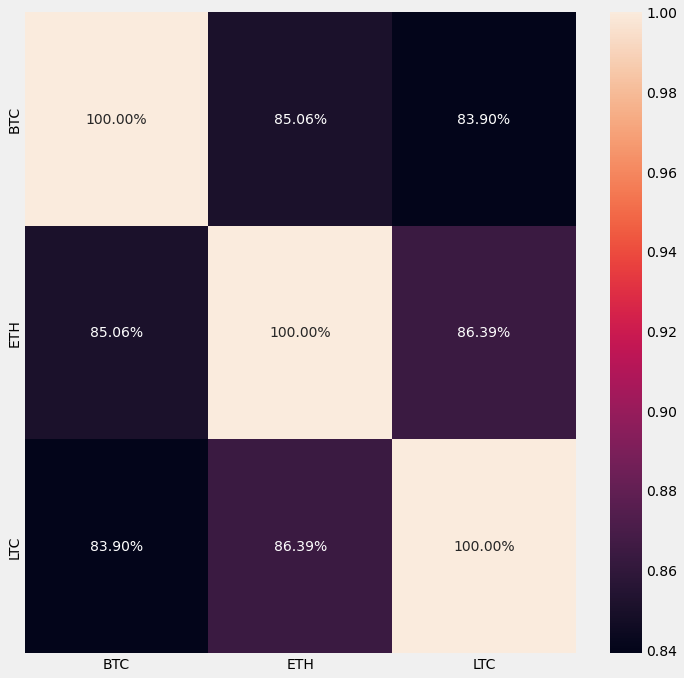

In [21]:
import seaborn as sns
plt.subplots(figsize= (11,11))
sns.heatmap(DSR.corr(), annot= True, fmt= '.2%')

In [22]:
DCSR = (DSR+1).cumprod()
DCSR

,BTC,ETH,LTC
0,NaN,NaN,NaN
1,0.866783,0.908160,0.803110
2,0.876758,0.891200,0.839742
3,0.879656,0.978496,0.864450
4,0.824628,0.872723,0.794333
...,...,...,...
361,0.626086,0.632354,0.250593
362,0.600644,0.603896,0.249018
363,0.534295,0.538640,0.206570
364,0.547097,0.562168,0.212584


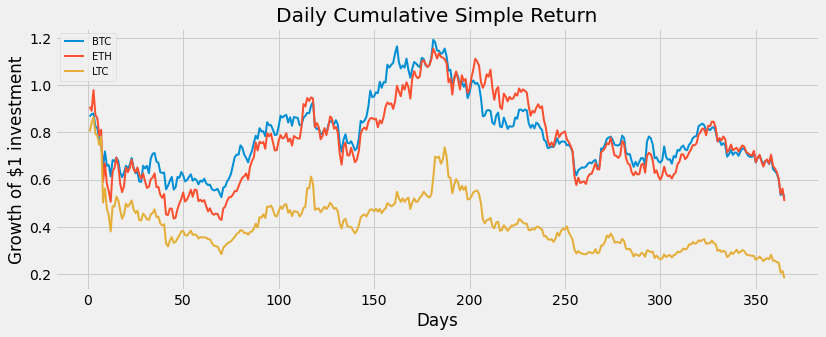

In [23]:
plt.figure(figsize=(12.2, 4.5))
for c in DCSR.columns.values:
  plt.plot(DCSR.index, DCSR[c], lw=2, label= c)
plt.title('Daily Cumulative Simple Return')
plt.xlabel('Days')
plt.ylabel('Growth of $1 investment')
plt.legend(DCSR.columns.values, loc = 'upper left', fontsize = 10)
plt.show()